<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets_reddit.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets_reddit.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [1]:
import pandas as pd
import praw
import secrets_reddit

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id = secrets_reddit.REDDIT_API_CLIENT_ID,
    client_secret = secrets_reddit.REDDIT_API_CLIENT_SECRET,
    user_agent = secrets_reddit.REDDIT_API_USER_AGENT
)

In [2]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

In [3]:
subreddit = reddit.subreddit("machinelearning")

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected outputs you will see are from `r/machinelearning` unless otherwise specified.

What is the display name of the subreddit?

In [4]:
subreddit.display_name

'machinelearning'

<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [7]:
subreddit.title

'Machine Learning'

<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [20]:
print(subreddit.description)

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [10]:
# try run this line, what do you see? press q once you are done
?subreddit.top

In [18]:
for i in subreddit.top(time_filter="all",limit=10):
    print(i.title)

[Project] From books to presentations in 10s with AR + ML
[D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
[R] First Order Motion Model applied to animate paintings
[N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
[D] This AI reveals how much time politicians stare at their phone at work
[D] Types of Machine Learning Papers
[D] The machine learning community has a toxicity problem
I made a robot that punishes me if it detects that if I am procrastinating on my assignments [P]
[Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
[P] Using oil portraits and First Order Model to bring the paintings back to life


<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [19]:
for i in subreddit.top(time_filter='week',limit=10):
    print(i.title)

[P] Building a App for Stable Diffusion: Text to Image generation in Python
[R] Sketch2Pose — estimating a 3D character pose from a bitmap sketch
[D] StableDiffusion v1.4 is entirely public. What do you think about Stability.ai ?
[D] How to Run Stable Diffusion (Locally and in Colab)
[D] In 2010, did people expect things like DALLE and AlphaFold to be only 10/13 years away?
[D] ML for Good
[N] John Carmack raises $20M from various investors to start Keen Technologies, an AGI Company.
[D][N]"Mudge learned that Twitter had never acquired proper legal rights to training material used to build Twitter's key Machine Learning models. The Machine Learning models at issue were some of the core models running the company's most basic products, like which Tweets to show each user."
[R] Musika! Fast Infinite Waveform Music Generation + Gradio Web Demo
[D] Has any non-PhD here published an ML paper?


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [22]:
for i in subreddit.top(time_filter='week',limit=10):
    print("title:", i.title)
    print("distinguished:", i.distinguished)
    print("num_comments:", i.num_comments)
    print("score:", i.score)

title: [P] Building a App for Stable Diffusion: Text to Image generation in Python
distinguished: None
num_comments: 31
score: 858
title: [R] Sketch2Pose — estimating a 3D character pose from a bitmap sketch
distinguished: None
num_comments: 12
score: 588
title: [D] StableDiffusion v1.4 is entirely public. What do you think about Stability.ai ?
distinguished: None
num_comments: 125
score: 408
title: [D] How to Run Stable Diffusion (Locally and in Colab)
distinguished: None
num_comments: 48
score: 259
title: [D] In 2010, did people expect things like DALLE and AlphaFold to be only 10/13 years away?
distinguished: None
num_comments: 91
score: 219
title: [D] ML for Good
distinguished: None
num_comments: 47
score: 212
title: [N] John Carmack raises $20M from various investors to start Keen Technologies, an AGI Company.
distinguished: None
num_comments: 197
score: 211
title: [D][N]"Mudge learned that Twitter had never acquired proper legal rights to training material used to build Twitter's

💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

Attribute 'over_18' could contain explicit language or imagery while the larger issue being data is being used to predict stock pucrhase/ selling decisions which the original poster should have a notification of intended usage

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 


In [ ]:
%%time
from praw.models import MoreComments

# create empty list
top_comments = []

# parse through the top 10 submissions for our subreddit
for submission in subreddit.top(limit=10):
    #of the comment forest with body of replies, get the top level comment
    for top_level_comment in submission.comments:
        #MoreComments objects represent the “load more comments”, and “continue this thread” links encountered, which we ignore as its not "true" top level comment
        if isinstance(top_level_comment, MoreComments):
            continue
        #add body of top comment to our custom list defined above
        top_comments.append(top_level_comment.body)

#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [35]:
print(len(top_comments))
print(top_comments[:3])

741
['Twitter thread: [https://twitter.com/cyrildiagne/status/1259441154606669824](https://twitter.com/cyrildiagne/status/1259441154606669824)\n\nCode: [https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard](https://github.com/cyrildiagne/ar-cutpaste/tree/clipboard)\n\nBackground removal is done with U^(2-Net) (Qin et Al, Pattern Recognition 2020): [https://github.com/NathanUA/U-2-Net](https://github.com/NathanUA/U-2-Net)\n\n**/!\\\\ EDIT:** You can now subscribe to a beta program to get early access to the app: [https://arcopypaste.app](https://arcopypaste.app)  !', 'Simple yet very useful. Thank you for sharing the code.', 'The future 🤯']


In [34]:
import random

[random.choice(top_comments) for i in range(3)]

['Why tf is this visually satisfying',
 'The pearl earring girl looks freakishly realistic',
 'At first I was reading punches...']

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

In [36]:
[random.choice(top_comments) for i in range(6)]

['Still accurate than tesseract lol 😂',
 'At the root of these issues ... we\'ve all noticed an aggressive push for "social justice" in the machine learning community. This has been organized by a small number of politically motivated activists who do not represent the community as a whole, outsiders who aren\'t ML experts themselves. Its impact on the community has been extremely negative. This can be seen in how LeCun was recently silenced on Twitter, or how some people are now claiming [they should get more citations because of their skin color or gender](https://twitter.com/adjiboussodieng/status/1277599545996779521?s=19).',
 "Mona Lisa's got some funky jowl swinging, there.",
 "That is cool. However, procrastinating is a great thing to do. Most of my favorite papers and projects I've worked on come from me getting up from my desk and walking around the department looking for people to have coffee and random discussions so I don't have to work. So while maybe studying is important 

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [37]:
subreddit_tsla = reddit.subreddit("TSLA")

top_comments_tsla = []

for submission in subreddit_tsla.top(time_filter="year",limit=10):
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        top_comments_tsla.append(top_level_comment.body)

In [38]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

158

In [39]:
[random.choice(top_comments_tsla) for i in range(3)]

['820 shares and 4 longterm puts sold for about 100k premium (strike between 600 and 900)\nbought first share in Dec 2018 and only added until then. hope I can retire in 5 years 😆',
 'This is a surprise. Interested to hear more details.',
 'I consolidated my losing options to one new option and made some good money on it so far but not enough to cover the losses. :/ still have my stock though.']

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

There could be selection bias in data - perhaps the content from reddit is primarily from silicon tech industry whose beliefs/ behavior could be independent of broader audience
A larger availability bias could also come into play however, perhaps a political headlines could have positive or negative impact on TESLA and capturing those streams would provide comprehensive views

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [40]:
from transformers import pipeline

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [42]:
sentiment_model = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [45]:
comment = random.choice(top_comments_tsla)

In [46]:
comment

"I stayed long.\n\nNot because of faith.\n\nBecause of Tesla's increasing dominance and profit."

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [47]:
sentiment = sentiment_model(comment)
print(sentiment)

[{'label': 'NEGATIVE', 'score': 0.849597692489624}]


What is the type of the output `sentiment`?

Negative lable with confidence of approx. 85%

In [53]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: I stayed long.

Not because of faith.

Because of Tesla's increasing dominance and profit.
Predicted Label is NEGATIVE and the score is 0.850


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?

score here is the confidence of the model for the label attributed to the comment

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [51]:
%%writefile top_tlsa_comment_sentiment.py

import secrets_reddit as sr
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=sr.REDDIT_API_CLIENT_ID,
        client_secret=sr.REDDIT_API_CLIENT_SECRET,
        user_agent=sr.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline('sentiment-analysis')
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    subreddit = get_subreddit('TSLA')
    comments = get_comments(subreddit)
    comment = random.choice(comments)
    sentiment = run_sentiment_analysis(comment)
    
    print(f'The comment: {comment}')
    print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Overwriting top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [52]:
!python top_tlsa_comment_sentiment.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
The comment: Lies...why would an R&D person in the company be involved in this? I don’t buy it.
Predicted Label is NEGATIVE and the score is 1.000


<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

In [58]:
cntr=0
for submission in subreddit.top(time_filter = 'day', limit = None):
    for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            cntr+=1

cntr

38

today we had 38 posts in our subreddit

💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

In [59]:
from collections import Counter
post_auth=[]
for submission in subreddit.top(time_filter = 'week', limit = None):
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        post_auth.append(top_level_comment.author)

c = Counter( post_auth )
print( c.items() )

dict_items([(Redditor(name='Illustrious_Row_9971'), 5), (Redditor(name='kkngs'), 2), (Redditor(name='samdutter'), 1), (Redditor(name='hleszek'), 2), (Redditor(name='lugiavn'), 1), (Redditor(name='zerohistory'), 1), (None, 2), (Redditor(name='designed_perfect'), 1), (Redditor(name='bmsan-gh'), 1), (Redditor(name='ai_hero'), 2), (Redditor(name='mr_birrd'), 2), (Redditor(name='sampog'), 1), (Redditor(name='noobiemaster_69'), 2), (Redditor(name='UnderstandingDry1256'), 2), (Redditor(name='Macvanderspek'), 1), (Redditor(name='SpatialComputing'), 1), (Redditor(name='LeDamien19'), 1), (Redditor(name='Cryogenicist'), 1), (Redditor(name='cryptosupercar'), 1), (Redditor(name='DudenessR2'), 1), (Redditor(name='Tintin_Quarentino'), 1), (Redditor(name='tryght'), 1), (Redditor(name='klop2031'), 1), (Redditor(name='toastyoats'), 1), (Redditor(name='mlresearchoor'), 3), (Redditor(name='_HIST'), 1), (Redditor(name='yaosio'), 1), (Redditor(name='dat_cosmo_cat'), 1), (Redditor(name='Bonerjam98'), 2), (Re

In [62]:
len(c)

383

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

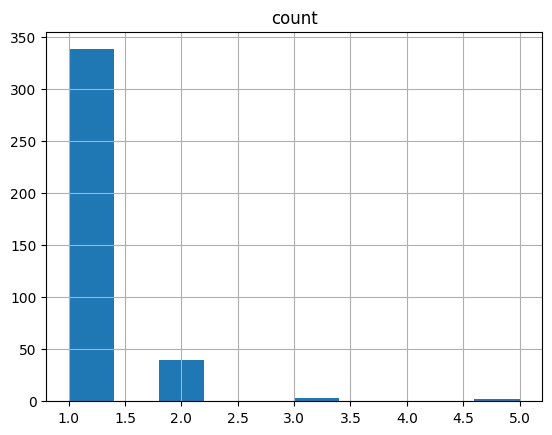

In [72]:
import pandas as pd
c_df=pd.DataFrame(c, index=['count']).transpose()
c_df.hist('count')


of the 383 posts over the past week, we have a skewed distribution with a large of posters posting for only time.